In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ces2020 = pd.read_csv('./dados/MICRODADOS_CADASTRO_CURSOS_2020_ALTO_TIETE.csv'
                     ,sep=';'
                     ,header=0
                     ,encoding='latin-1'
                     ,low_memory=True)

In [3]:
ces2020=ces2020[(ces2020['NO_MUNICIPIO']=='Guarulhos')&(ces2020['NO_CINE_AREA_GERAL']=='Educação')]

In [4]:
agrupamento='NO_CINE_ROTULO'
atributos=['QT_MAT_BRANCA','QT_MAT_PRETA','QT_MAT_PARDA','QT_MAT_AMARELA','QT_MAT_INDIGENA','QT_MAT_CORND']
ces2020Agrup=ces2020.groupby(by=agrupamento)[atributos].sum()
ces2020Agrup.reset_index(inplace=True)
ces2020Agrup

,NO_CINE_ROTULO,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND
0,Artes formação de professor,0,0,1,0,0,1
1,Artes visuais formação de professor,37,4,16,2,0,10
2,Biologia formação de professor,27,6,15,2,1,2
3,Ciências sociais formação de professor,87,40,61,5,1,9
4,Computação formação de professor,2,0,3,0,0,0
5,Educação especial formação de professor,4,2,2,1,0,1
6,Educação física formação de professor,75,15,35,4,0,102
7,Ensino profissionalizante em área específica f...,2,0,3,0,0,0
8,Ensino religioso formação de professor,1,0,0,0,0,0
9,Filosofia formação de professor,71,16,47,1,0,9


In [5]:
ces2020Agrup=ces2020Agrup[(ces2020Agrup['NO_CINE_ROTULO']=='Pedagogia')].copy()
ces2020Agrup.drop(columns=['NO_CINE_ROTULO'], inplace=True)
ces2020Agrup

,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND
24,2174,293,1105,67,131,1094


In [6]:
etiquetas=['BRANCA','PRETA','PARDA','AMARELA','INDIGENA','NÃO DEFINIDO']
cores=['red','green','blue','cyan','black','brown']

In [7]:
dados = []

for valor in ces2020Agrup:
    v=int(ces2020Agrup[valor].values)
    dados.append(v)

dados
    

C:\Users\Jose Marcelo\AppData\Local\Temp\ipykernel_24104\2328114448.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v=int(ces2020Agrup[valor].values)


[2174, 293, 1105, 67, 131, 1094]

<Axes: >

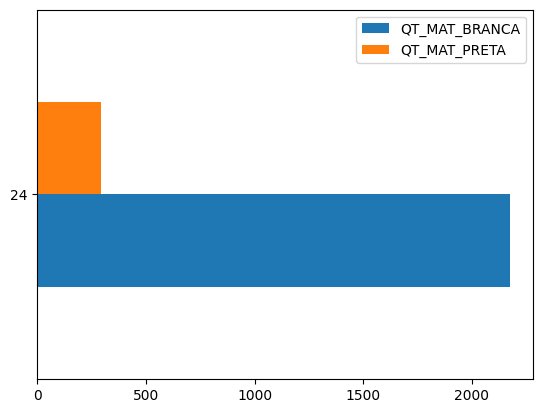

In [8]:

ces2020Agrup[['QT_MAT_BRANCA','QT_MAT_PRETA']].plot(kind='barh')




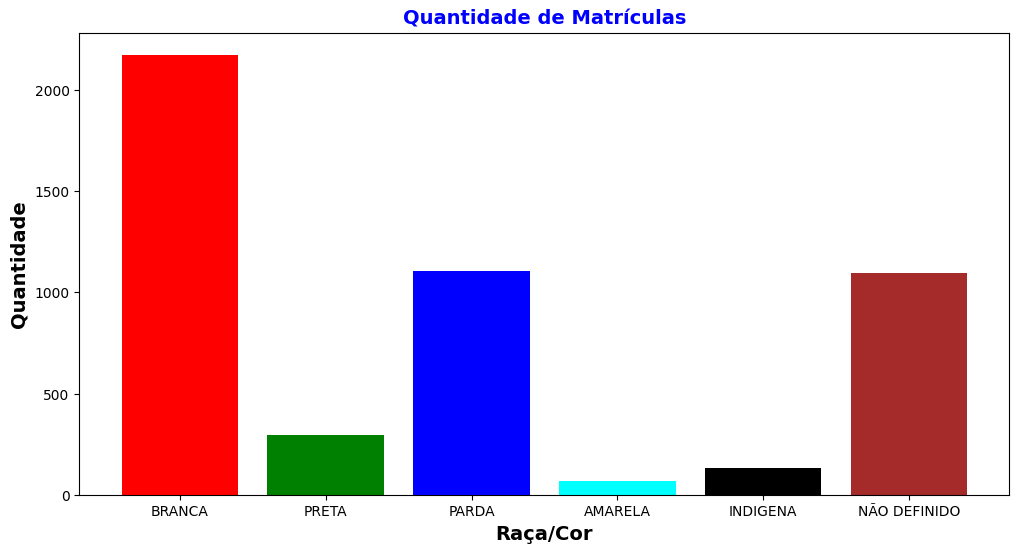

In [9]:
def barPlot(valores, etiquetas, **kwargs):
    plt.figure(figsize=(12,6))
    plt.title(kwargs['titulo'], c='blue', fontdict={'size':14, 'weight':'bold'})
    plt.bar(data=valores, x=etiquetas, height=valores, color=kwargs['cores'])
    plt.xlabel(kwargs['xlabel'], c='black', fontdict={'size':14, 'weight':'bold'})
    plt.ylabel(kwargs['ylabel'], c='black', fontdict={'size':14, 'weight':'bold'})
    plt.savefig('./imagens/ola.pdf', format='pdf', dpi=300)
    plt.show()

barPlot(dados
        ,etiquetas
        ,cores=cores
        ,titulo='Quantidade de Matrículas'
        ,xlabel='Raça/Cor'
        ,ylabel='Quantidade'
        )